In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("./data_lstm.csv")
data.head(10)

,time,p,avg,rms,min,max,min_lb,max_lb,shape,location,scale
0,0.00000,-0.420133,-0.420133,0.000000,-0.420133,-0.420133,-0.420133,-0.420133,-0.662855,-0.420133,1.560864e-17
1,0.22498,-0.398210,-0.409172,0.010961,-0.420133,-0.398210,-0.420133,-0.398210,1.258009,-0.403388,6.513435e-03
2,0.44998,-0.392214,-0.403519,0.012000,-0.420133,-0.392214,-0.420133,-0.392214,1.143411,-0.399018,7.779624e-03
3,0.67496,-0.442743,-0.413325,0.019912,-0.442743,-0.392214,-0.442743,-0.392214,1.189356,-0.409371,2.040542e-02
4,0.89993,-0.488844,-0.428429,0.035067,-0.488844,-0.392214,-0.488844,-0.392214,1.205695,-0.420634,3.426537e-02
5,1.12491,-0.484030,-0.437696,0.038133,-0.488844,-0.392214,-0.488844,-0.392214,1.226224,-0.434421,5.175496e-02
6,1.34991,-0.455369,-0.440221,0.035842,-0.488844,-0.392214,-0.488844,-0.392214,1.105901,-0.430141,4.194376e-02
7,1.57488,-0.440763,-0.440288,0.033527,-0.488844,-0.392214,-0.488844,-0.392214,1.094388,-0.438688,5.086110e-02
8,1.79986,-0.434161,-0.439608,0.031668,-0.488844,-0.392214,-0.488844,-0.392214,0.524578,-0.446945,3.473578e-02
9,2.02488,-0.395872,-0.435234,0.032783,-0.488844,-0.392214,-0.488844,-0.392214,1.059071,-0.435083,4.540177e-02


In [2]:
data['TargetNextClose'] = data['p'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)

In [3]:
data_set = data.iloc[:, 0:13]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)

,index,time,p,avg,rms,min,max,min_lb,max_lb,shape,location,scale,TargetNextClose
0,0,0.00000,-0.420133,-0.420133,0.000000,-0.420133,-0.420133,-0.420133,-0.420133,-0.662855,-0.420133,1.560864e-17,-0.398210
1,1,0.22498,-0.398210,-0.409172,0.010961,-0.420133,-0.398210,-0.420133,-0.398210,1.258009,-0.403388,6.513435e-03,-0.392214
2,2,0.44998,-0.392214,-0.403519,0.012000,-0.420133,-0.392214,-0.420133,-0.392214,1.143411,-0.399018,7.779624e-03,-0.442743
3,3,0.67496,-0.442743,-0.413325,0.019912,-0.442743,-0.392214,-0.442743,-0.392214,1.189356,-0.409371,2.040542e-02,-0.488844
4,4,0.89993,-0.488844,-0.428429,0.035067,-0.488844,-0.392214,-0.488844,-0.392214,1.205695,-0.420634,3.426537e-02,-0.484030
5,5,1.12491,-0.484030,-0.437696,0.038133,-0.488844,-0.392214,-0.488844,-0.392214,1.226224,-0.434421,5.175496e-02,-0.455369
6,6,1.34991,-0.455369,-0.440221,0.035842,-0.488844,-0.392214,-0.488844,-0.392214,1.105901,-0.430141,4.194376e-02,-0.440763
7,7,1.57488,-0.440763,-0.440288,0.033527,-0.488844,-0.392214,-0.488844,-0.392214,1.094388,-0.438688,5.086110e-02,-0.434161
8,8,1.79986,-0.434161,-0.439608,0.031668,-0.488844,-0.392214,-0.488844,-0.392214,0.524578,-0.446945,3.473578e-02,-0.395872
9,9,2.02488,-0.395872,-0.435234,0.032783,-0.488844,-0.392214,-0.488844,-0.392214,1.059071,-0.435083,4.540177e-02,-0.374060


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.00000000e+00 0.00000000e+00 4.55565481e-01 ... 1.70613104e-01
  0.00000000e+00 4.74273521e-01]
 [1.85219485e-04 1.85215206e-04 4.74273521e-01 ... 2.77166544e-01
  1.62614862e-02 4.79390636e-01]
 [3.70438970e-04 3.70446878e-04 4.79390636e-01 ... 3.04974606e-01
  1.94226630e-02 4.36270606e-01]
 ...
 [9.99629561e-01 9.99629537e-01 7.10060562e-01 ... 8.48205810e-01
  3.37937265e-01 7.37242386e-01]
 [9.99814781e-01 9.99814768e-01 7.37242386e-01 ... 8.48467712e-01
  3.37967716e-01 7.78601945e-01]
 [1.00000000e+00 1.00000000e+00 7.78601945e-01 ... 8.48651553e-01
  3.38012788e-01 7.64236424e-01]]


In [5]:
# multiple feature from data provided to the model
X = []

backcandles = 10
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))

5400


In [6]:
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

4312
(4312, 10, 8)
(1078, 10, 8)
(4312, 1)
(1078, 1)
[[0.48453124]
 [0.46622226]
 [0.4960096 ]
 ...
 [0.59185016]
 [0.57264918]
 [0.55042018]]


In [7]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
259/259 [==============================] - 4s 7ms/step - loss: 0.0111 - val_loss: 0.0042
Epoch 2/30
259/259 [==============================] - 2s 6ms/step - loss: 0.0047 - val_loss: 0.0074
Epoch 3/30
259/259 [==============================] - 2s 6ms/step - loss: 0.0036 - val_loss: 0.0024
Epoch 4/30
259/259 [==============================] - 2s 6ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 5/30
259/259 [==============================] - 1s 5ms/step - loss: 0.0031 - val_loss: 0.0024
Epoch 6/30
259/259 [==============================] - 1s 5ms/step - loss: 0.0028 - val_loss: 0.0019
Epoch 7/30
259/259 [==============================] - 1s 5ms/step - loss: 0.0027 - val_loss: 0.0018
Epoch 8/30
259/259 [==============================] - 1s 5ms/step - loss: 0.0025 - val_loss: 0.0017
Epoch 9/30
259/259 [==============================] - 1s 5ms/step - loss: 0.0024 - val_loss: 0.0019
Epoch 10/30
259/259 [==============================] - 1s 5ms/step - loss: 0.0024 - val_loss: 0.0018

In [8]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

34/34 [==============================] - 0s 2ms/step
[0.53953725] [0.54673491]
[0.5192838] [0.56971506]
[0.5256037] [0.55783768]
[0.5577656] [0.57696822]
[0.52607805] [0.58180367]
[0.5656172] [0.56584199]
[0.5560884] [0.53018636]
[0.53257006] [0.5332379]
[0.4943028] [0.55272054]
[0.51972437] [0.57227359]


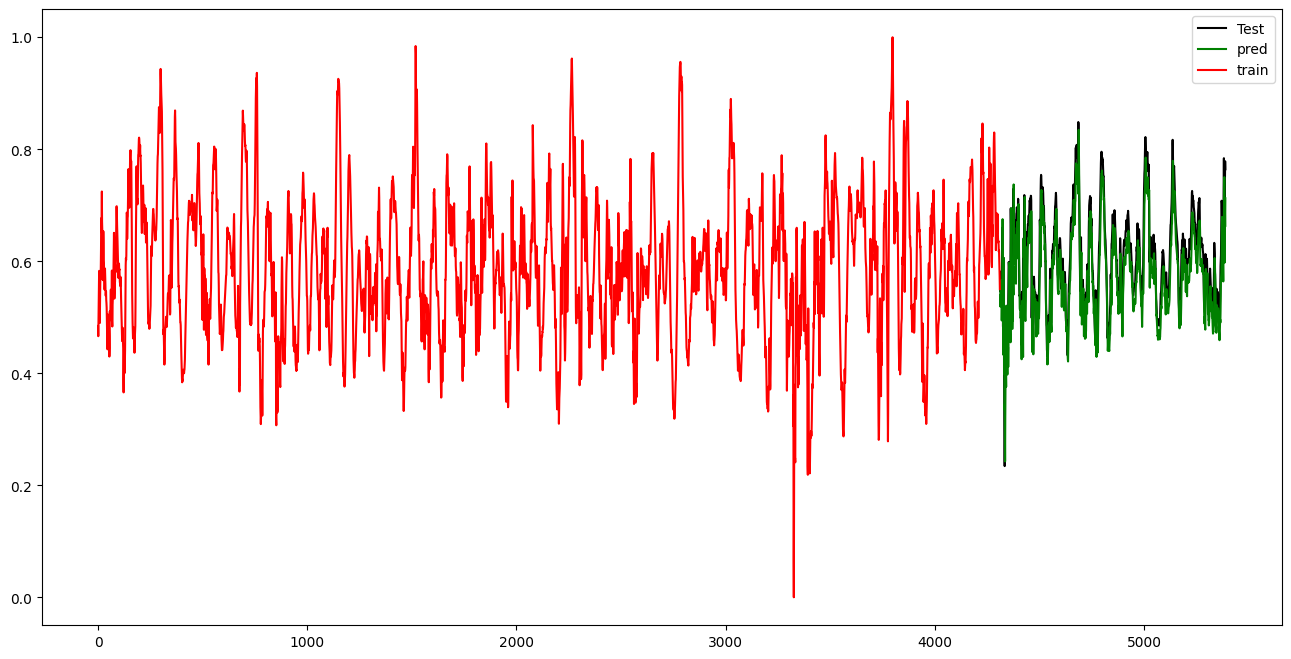

In [9]:
plt.figure(figsize=(16,8))
plt.plot([i + len(y_train) for i in range(len(y_test))], y_test, color = 'black', label = 'Test')
plt.plot([i + len(y_train) for i in range(len(y_pred))], y_pred, color = 'green', label = 'pred')
plt.plot([i for i in range(len(y_train))], y_train, color = 'red', label = 'train')
# plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

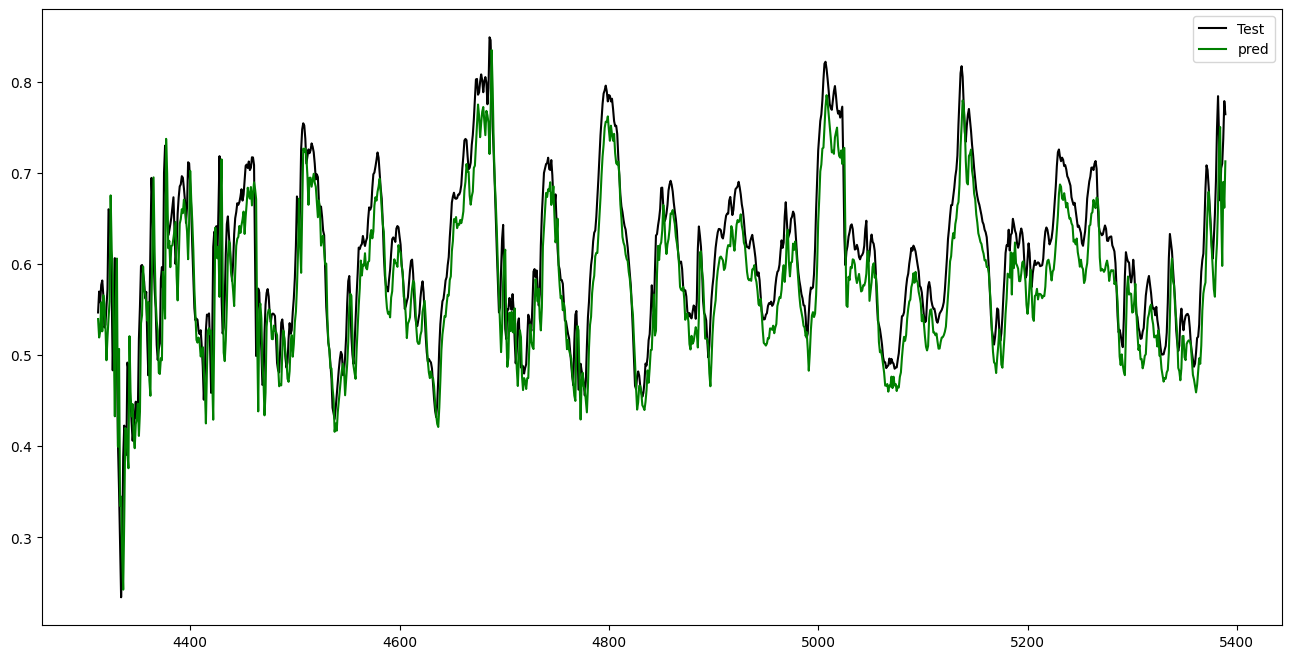

In [10]:
plt.figure(figsize=(16,8))
plt.plot([i + len(y_train) for i in range(len(y_test))], y_test, color = 'black', label = 'Test')
plt.plot([i + len(y_train) for i in range(len(y_pred))], y_pred, color = 'green', label = 'pred')
# plt.plot([i for i in range(len(y_train))], y_train, color = 'red', label = 'train')
# plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()